In [6]:
#export
import math
import numpy as np
from sklearn.cluster import KMeans
from skimage.color import rgb2gray
from skimage.feature import canny
from typing import Tuple
import matplotlib.pyplot as plt
from imageio import imread, imsave


# centers = detect_circles(img, radius, use_gradient) - Given an RGB image img, a target
# radius that specifies the size of circle we are looking for, and a flag use_gradient that allows the user
# to optionally exploit the gradient direction measured at the edge points. The output centers is an N x
# 2 matrix in which each row lists the (x, y) position of a detected circles’ center. Save this function
# in a file called submissionDetectCircles.py and submit it.

def detect_circles(img : np.ndarray, radius : int, use_gradient : bool):
    
    if img.ndim > 2:
        img = rgb2gray(img)
    
    edges = canny(img, sigma = 3, low_threshold = 0.05)
    # display results
    _, ax = plt.subplots()
    ax.axis("off")
    ax.imshow(edges)

    
    print(img.shape)
    
    
    degree_counts = 400
    vote_percent = 0.6
    
    
    d_max = int(round(math.sqrt(img.shape[0]**2 + img.shape[1]**2))) + 3
    degree_bins = np.linspace(0, math.pi, degree_counts)
    accumulator = np.zeros((d_max, degree_counts))


    for ix,iy in np.ndindex(edges.shape):
        if edges[ix, iy] == True:
#             print("edge pixel:" + " ix" + str(ix) + " iy" + str(iy))
            for theta_ind in range(degree_bins.shape[0]):
                theta = degree_bins[theta_ind]
                d = int(round(ix * math.cos(theta) - iy * math.sin(theta)))
                accumulator[d, theta_ind] += 1

    # ATAN2 is for gradient angle if use gradient is set
    # if use gradient is set you  only test the rounded
    # theta value from arctan 2 at each edge pixel
                        
    vote_threshold = int(round(np.max(accumulator) * vote_percent))
    
    results_d, results_theta = np.where(accumulator > vote_threshold)

    print(results_d.shape)
    cartesian_results = np.zeros((results_d.shape[0], 2),np.int)
    
    for i in range(results_d.shape[0]):
        cartesian_results[i] = np.array([int(round(results_d[i] * math.cos(results_theta[i]))) ,
                                         int(round(results_d[i] * math.sin(results_theta[i])))])

    cartesian_results = np.abs(cartesian_results)
  
    # Testings
    print(cartesian_results)
    for i in range(cartesian_results.shape[0]):
        circle = plt.Circle(cartesian_results[i], radius, color='g', clip_on=True)
        ax.add_artist(circle)
    
    return cartesian_results
    
                        
    

(594, 471)
(22,)
[[ 98 147]
 [177   3]
 [110 162]
 [197   5]
 [183  81]
 [ 31 199]
 [226  36]
 [ 92 211]
 [231   4]
 [390 328]
 [488 151]
 [137 494]
 [394 331]
 [343 384]
 [494 153]
 [510  82]
 [138 500]
 [139 501]
 [348 389]
 [530   0]
 [518 161]
 [584   0]]


<ipython-input-7-eebed43cf804>:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


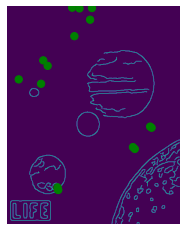

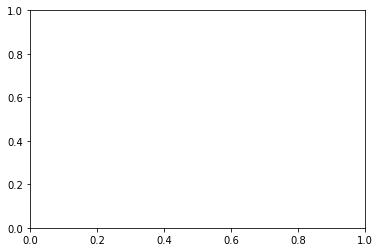

In [7]:
test_img = imread("./jupiter.jpg")

test_radius = 10

circles = detect_circles(test_img, test_radius, False)

fig, ax = plt.subplots() # note we must use plt.subplots, not plt.subplot

for i in range(circles.shape[0]):
    circle = plt.Circle(circles[i], test_radius, color='g', clip_on=True)
    ax.add_artist(circle)
    
    
fig.show()


